In [206]:
import pandas as pd

df = pd.read_csv('6timepoints-FourSpecies-addbase-filter-addsignificant.csv',sep=',')
df.head()

,Gene,BaseMean,Log2Fold,Pvalue
0,Pgl_GLEAN_10005356,257.588333,-0.076667,0.347962
1,Pgl_GLEAN_10038194,30.011667,-0.471667,0.449496
2,Pgl_GLEAN_10027414,84.375000,0.083333,0.685954
3,Pgl_GLEAN_10038163,29.290000,0.223333,0.675698
4,Pgl_GLEAN_10020883,3.830000,3.120000,0.048956


In [207]:
positive = df[(df.Log2Fold >= 2) & (df.Pvalue < 0.05)]
negative = df[(df.Log2Fold <= -2) & (df.Pvalue < 0.05)]
middle = df[(df.Log2Fold >= -0.1) & (df.Log2Fold <= 0.1)]

In [208]:
df.shape

(109173, 4)

In [209]:
import numpy as np

x = np.median(positive.BaseMean)
y = np.median(negative.BaseMean)
z = np.median(middle.BaseMean)

big = pd.concat([positive, negative])
b = np.median(big.BaseMean)
print x,y,z,b

18.56 14.26 49.483000000000004 15.97


In [210]:
mx = max(positive.BaseMean)
my = max(negative.BaseMean)
mz = max(middle.BaseMean)
print mx,my,mz

27861.06 9435.88 3033.95


In [211]:
a = len(positive.BaseMean)
b = len(negative.BaseMean)
c = len(df_row.BaseMean)
print a,b,c

6963 5277 20264


In [281]:
#=================== using top smallest log2fold change value to represent the total negative controls ========#

positive = df[(df.Log2Fold >= 2) & (df.Pvalue < 0.05)]
negative = df[(df.Log2Fold <= -2) & (df.Pvalue < 0.05)]
middle = df[(df.Log2Fold >= -0.1) & (df.Log2Fold <= 0.1)]

In [282]:
sm = middle[(middle.BaseMean >=1) & (middle.BaseMean <=100)]
sm100 = middle[middle.BaseMean > 100].sample(frac=0.1)
#sm500 = middle[middle.BaseMean > 500].sample(frac=0.05)
middle = pd.concat([sm, sm100])
middle['AbsLog2Fold'] = abs(middle['Log2Fold'])
mymiddle = middle.sort_values(by=['AbsLog2Fold'])
fmiddle = mymiddle[:(a+b)]
pmiddle = mymiddle[:a]
nmiddle = mymiddle[:b]

In [283]:
print len(fmiddle.AbsLog2Fold),np.median(fmiddle.BaseMean)
print x,y

12240 27.7745
18.56 14.26


In [284]:
fmiddle.to_csv('6timepoints-FourSpecies-addbase-filter-addsignificant-middle-samepos_neg.csv')
pmiddle.to_csv('6timepoints-FourSpecies-addbase-filter-addsignificant-middle-samepos.csv')
nmiddle.to_csv('6timepoints-FourSpecies-addbase-filter-addsignificant-middle-sameneg.csv')
positive.to_csv('6timepoints-FourSpecies-addbase-filter-addsignificant-positive.csv')
negative.to_csv('6timepoints-FourSpecies-addbase-filter-addsignificant-negative.csv')

#==================== end ====================================================================================#

In [19]:
sm = middle[(middle.BaseMean <= 80) & (middle.BaseMean >= 1)]
sm100 = middle[middle.BaseMean > 100].sample(frac=0.08)
sm500 = middle[middle.BaseMean > 500].sample(frac=0.05)
df_row = pd.concat([sm, sm100, sm500])

print np.median(df_row.BaseMean), len(df_row.BaseMean)

23.107 11240


In [20]:
df_row.to_csv('6timepoints-FourSpecies-addbase-filter-addsignificant-middle-log2as01.csv')
positive.to_csv('6timepoints-FourSpecies-addbase-filter-addsignificant-positive-log2as01.csv')
negative.to_csv('6timepoints-FourSpecies-addbase-filter-addsignificant-negative-log2as01.csv')

In [57]:
from scipy import stats

stats.ttest_ind(positive.BaseMean,sm.BaseMean)

Ttest_indResult(statistic=20.41413699044386, pvalue=8.813872177281352e-92)

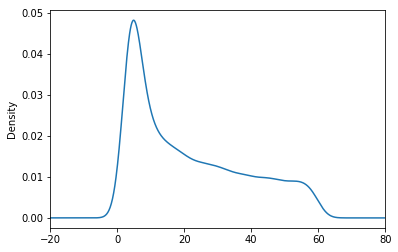

In [64]:
import seaborn as sns

sm.BaseMean.plot.kde(xlim=(-20,80))

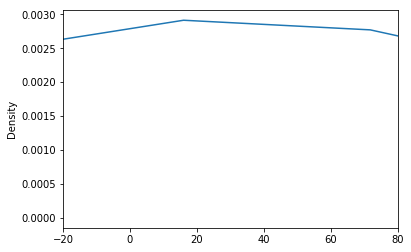

In [63]:
sm_positive = positive[(positive.BaseMean > -20) & (positive.BaseMean) < 80]
sm_positive.BaseMean.plot.kde(xlim=(-20,80))

In [188]:
four = pd.read_csv('MachineLearning/FourSpecies_allfeatures_RFformat.csv')
four.head()

,Gene,A_Body,T_Body,C_Body,G_Body,AA_Body,AT_Body,AC_Body,AG_Body,TA_Body,...,Lysratio,Metratio,Pheratio,Proratio,Serratio,Thrratio,Trpratio,Tyrratio,Valratio,Class
0,Pgl_GLEAN_10000040,0.319820,0.264264,0.198198,0.217718,0.078078,0.087087,0.057057,0.076577,0.081081,...,0.036199,0.027149,0.027149,0.036199,0.072398,0.072398,0.004525,0.013575,0.063348,1.0
1,Pgl_GLEAN_10000045,0.156695,0.142450,0.378917,0.321937,0.019943,0.022792,0.025641,0.085470,0.005698,...,0.043103,0.025862,0.043103,0.258621,0.060345,0.017241,0.000000,0.000000,0.077586,0.0
2,Pgl_GLEAN_10000048,0.238095,0.104762,0.266667,0.390476,0.057143,0.009524,0.042857,0.119048,0.019048,...,0.115942,0.014493,0.014493,0.028986,0.086957,0.043478,0.000000,0.028986,0.028986,2.0
3,Pgl_GLEAN_10000050,0.248175,0.287105,0.195864,0.268856,0.055961,0.063260,0.036496,0.076642,0.040146,...,0.051282,0.010989,0.047619,0.047619,0.117216,0.036630,0.007326,0.025641,0.098901,0.0
4,Pgl_GLEAN_10000055,0.360215,0.178763,0.172043,0.288978,0.083333,0.049731,0.072581,0.120968,0.048387,...,0.068826,0.016194,0.004049,0.048583,0.032389,0.145749,0.000000,0.000000,0.109312,0.0


In [189]:
four.shape

(51749, 82)

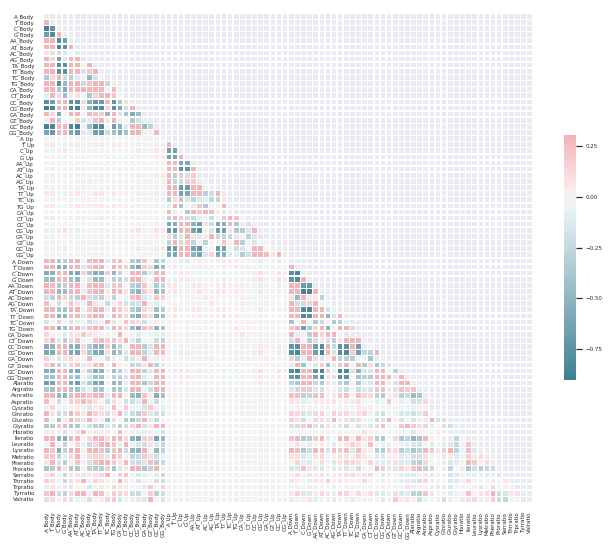

In [190]:
# generate the correlation matrix between variables 
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# data organization
four_df = four.drop(columns=['Gene','Class'])
corr = four_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
           xticklabels=True, yticklabels=True)

In [191]:
clean_four = four.dropna()
clean_four.Class.unique()

array([1., 0., 2.])

In [192]:
x = clean_four[clean_four.Class == 0]
y = clean_four[clean_four.Class == 1]
z = clean_four[clean_four.Class == 2]
print len(x),len(y),len(z)

39142 6803 5208


In [197]:
# start the data organization for random forest

# Labels are the values we want to predict
# now we are making prediction for Class 0 vs. 1
subx = y.sample(frac=0.8, random_state=100)
temp = pd.concat([subx, z])
ndata = temp.sample(frac=1, random_state=10)

ndata.to_csv("1vs2_sample_predictions.csv")

In [129]:
labels = np.array(ndata['Class'].astype('category'))

# Remove the labels from the features
# axis 1 refers to the columns
ndata = ndata.drop('Gene', axis=1)
features = ndata.drop('Class', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [115]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.20, random_state = 42)

In [116]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

('Training Features Shape:', (4768, 80))
('Training Labels Shape:', (4768,))
('Testing Features Shape:', (1192, 80))
('Testing Labels Shape:', (1192,))


In [22]:
# Start model training
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 500, random_state = 42)

In [23]:
rf.fit(train_features, train_labels)

NameError: name 'train_features' is not defined

In [ ]:
# looking at out of bag score

rf.oob_score_

In [ ]:
# give the roc auc score

y_oob = rf.oob_prediction_
print "c-stat:", roc_auc_score(y, y_oob)

In [127]:
from sklearn import metrics

predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Calculate and display accuracy
predictions
fpr, tpr, thresholds = metrics.roc_curve(test_labels, predictions, pos_label=2)

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
